In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/house_pricing.csv'
df = pd.read_csv(url)
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


feature analysis and selection

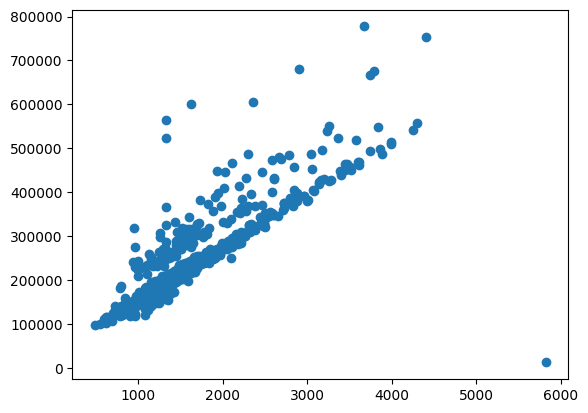

In [3]:
# relation between area and price
plt.scatter(df.SquareFeet, df.Price)

check correlation between features and target when using linear models
- features are numerical
- predictors are numerical

Pearson Correlation: 0.851755035476082


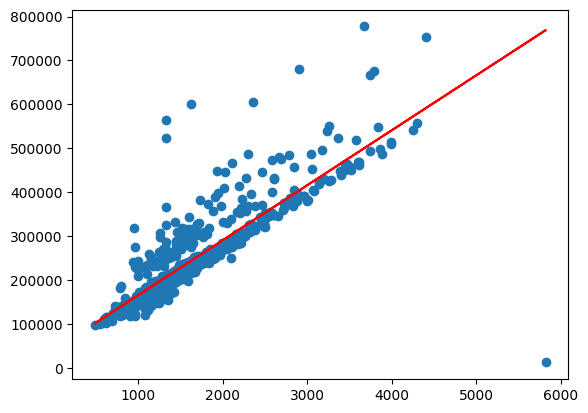

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['SquareFeet']], df.Price)
pred = model.predict(df[['SquareFeet']])
plt.scatter(df.SquareFeet, df.Price)
plt.plot(df.SquareFeet, pred, color='red')
# pearson correlation
pc = df.SquareFeet.corr(df.Price)
print('Pearson Correlation:', pc)

In [5]:
df.select_dtypes(include='number').corrwith(df.Price)

Beds          0.609677
Baths         0.632218
SquareFeet    0.851755
Price         1.000000
dtype: float64

pearson correlation coefficient
- if value close to 1, strong positive correlation
- if value close to -1, strong negative correlation
- if value close to 0, no correlation


In [6]:
df.select_dtypes(include='number').columns

Index(['Beds', 'Baths', 'SquareFeet', 'Price'], dtype='object')

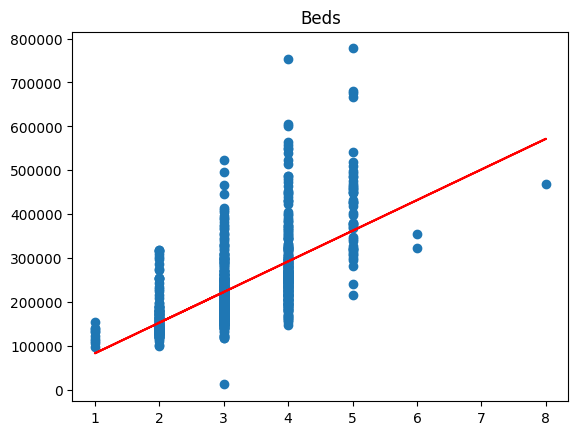

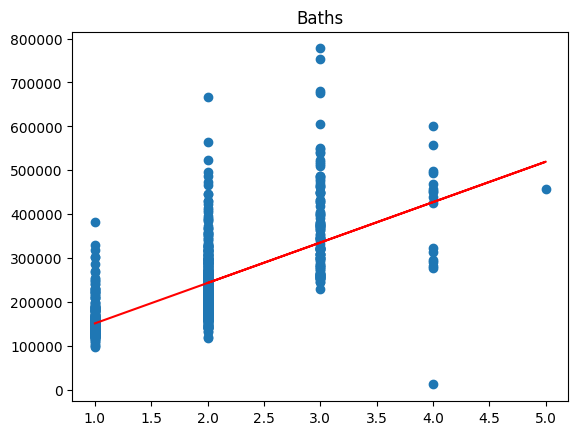

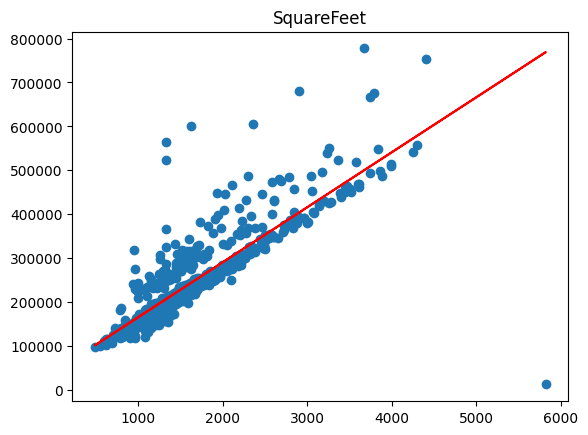

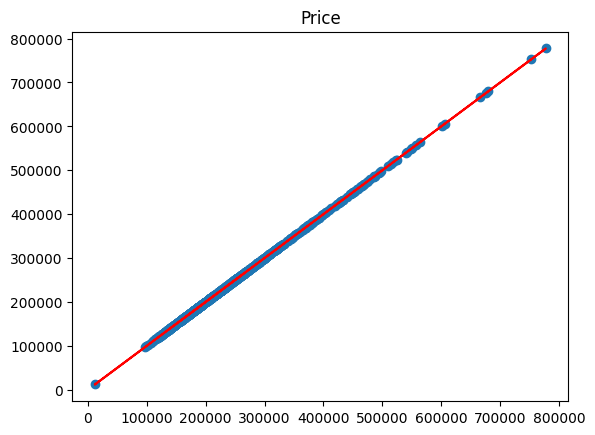

In [7]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.scatter(df[col], df.Price)  
    plt.title(col)
    model = LinearRegression()
    model.fit(df[[col]], df.Price)
    plt.plot(df[col], model.predict(df[[col]]), color='red')
    plt.show()

- for categorical independent variables with numerical target
    - boxplot analysis (visual)
    - anova test
        - null hypothesis: means of the groups are equal
        - if p-value < 0.05, reject null hypothesis
        - if p-value > 0.05, fail to reject null hypothesis

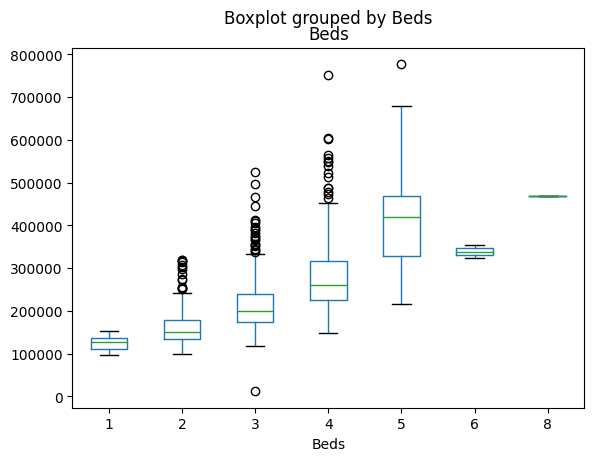

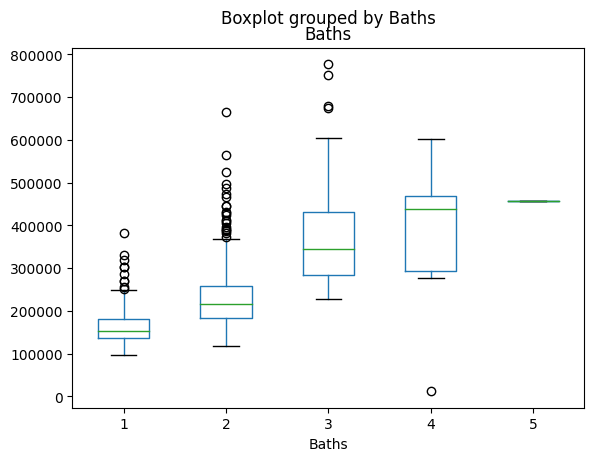

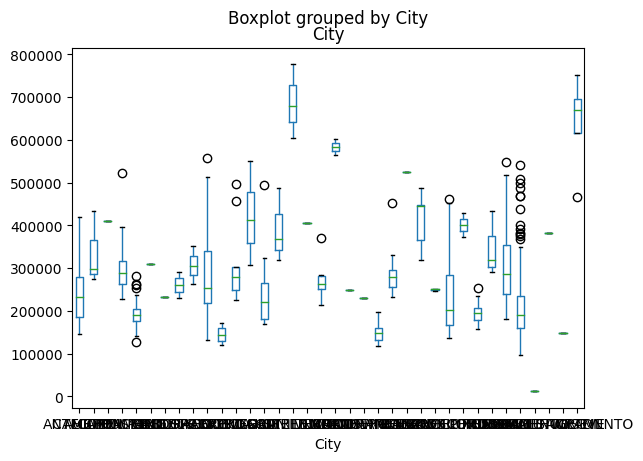

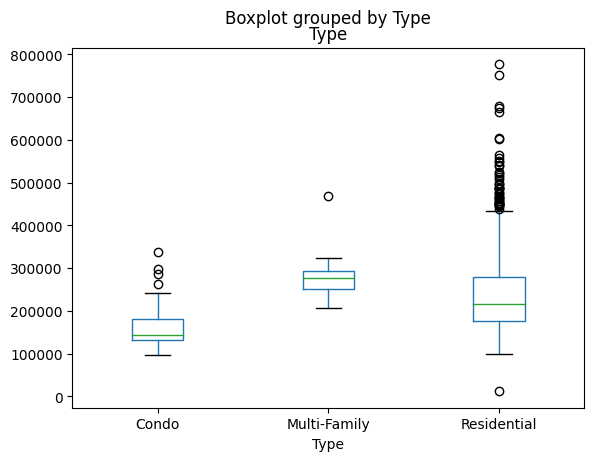

In [8]:
cat_cols = ['Beds', 'Baths','City','Type']
for col in cat_cols:
    df.boxplot(column='Price', by=col, grid=False)
    plt.title(col)

# testing with anova
- for each feature, calculate the f-statistic and p-value
- if p-value < 0.05, reject null hypothesis (means the column is important)
- if p-value > 0.05, fail to reject null hypothesis (means the column is not important)

In [9]:
selected_cols = ['SquareFeet', 'Beds', 'Baths', 'Type']
X = df[selected_cols]
y = df.Price

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [11]:
X.head()

,SquareFeet,Beds,Baths,Type
0,836,2,1,Residential
1,1167,3,1,Residential
2,796,2,1,Residential
3,852,2,1,Residential
4,797,2,1,Residential


In [12]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([   
    ('onehot', OneHotEncoder())
])
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])
model = Pipeline([
    ('pre', preprocessor),
    ('lr', LinearRegression())
])
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SquareFeet', 'Beds', 'Baths'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Type'], dtype='object'))])),
                ('lr', LinearRegression())])

a learning curve test can be used to check if the model is overfitting or underfitting at this point

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Training Results")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R2:", r2_score(y_train, y_train_pred))
print('-'*50)
print("Testing Results")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R2:", r2_score(y_test, y_test_pred))

Training Results
MSE: 2789335536.554368
MAE: 26926.595254788946
R2: 0.7036525354402217
--------------------------------------------------
Testing Results
MSE: 1845847144.4077463
MAE: 26224.19962775409
R2: 0.8127547508776796


model persistance

In [15]:
import joblib
import os
# create a directory to save models
os.makedirs(os.path.join(os.getcwd(), 'models'), exist_ok=True)
# save model - dumping
path = os.path.join(os.getcwd(), 'models', 'house_price_model')
joblib.dump(model,path)

['/Users/ayush/Desktop/AI& ML digipodium/supervised_Ml/models/house_price_model']

loading a saved model

In [16]:
path = os.path.join(os.getcwd(), 'models', 'house_price_model')
model = joblib.load(path)
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SquareFeet', 'Beds', 'Baths'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Type'], dtype='object'))])),
                ('lr', LinearRegression())])

making predictions with a model

In [17]:
# very simple example data
print(model.predict(X.head()))

[140539.4487363  183512.53384354 136001.92808916 142354.45699516
 136115.36610534]


In [18]:
X.iloc[0]

SquareFeet            836
Beds                    2
Baths                   1
Type          Residential
Name: 0, dtype: object

In [19]:
print(X.Type.unique().tolist())

['Residential', 'Condo', 'Multi-Family']


In [20]:
# manual data input
inpX = pd.DataFrame({
    'SquareFeet': [1200],
    'Beds': [5],
    'Baths': [5],
    'Type': ['Residential']
})
result = model.predict(inpX)
print(*result, sep='\n') # short cut to print each element of list on new line

223639.66436413376


evaluating the training and testing performance of a model

/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 993, in score
    Xt = transform.transform(Xt)
  File "/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 273, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 1014, 

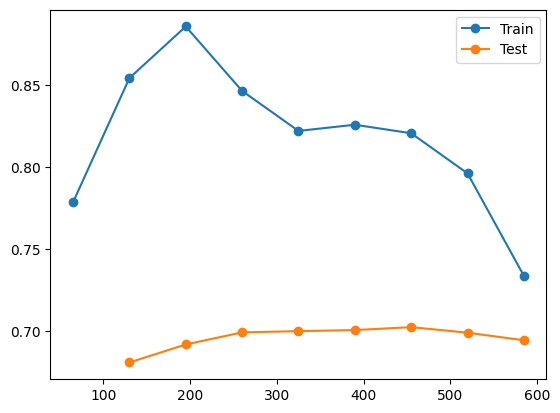

In [21]:
from sklearn.model_selection import learning_curve



train_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9,]
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, 
                                                        train_sizes=train_sizes)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train', marker='o')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test', marker='o')
plt.legend()
plt.show()

making a decision tree model, to check the updated accuracy

In [22]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [23]:
model2 = Pipeline([
    ('pre', preprocessor),
    ('dt', DecisionTreeRegressor())
])
model2.fit(X_train, y_train)
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

print("Training Results")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R2:", r2_score(y_train, y_train_pred))
print('-'*50)
print("Testing Results")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R2:", r2_score(y_test, y_test_pred))

Training Results
MSE: 136824864.01922762
MAE: 2405.3789928315414
R2: 0.9854633115989614
--------------------------------------------------
Testing Results
MSE: 4130751081.7238326
MAE: 34161.54933026585
R2: 0.5809709825090392


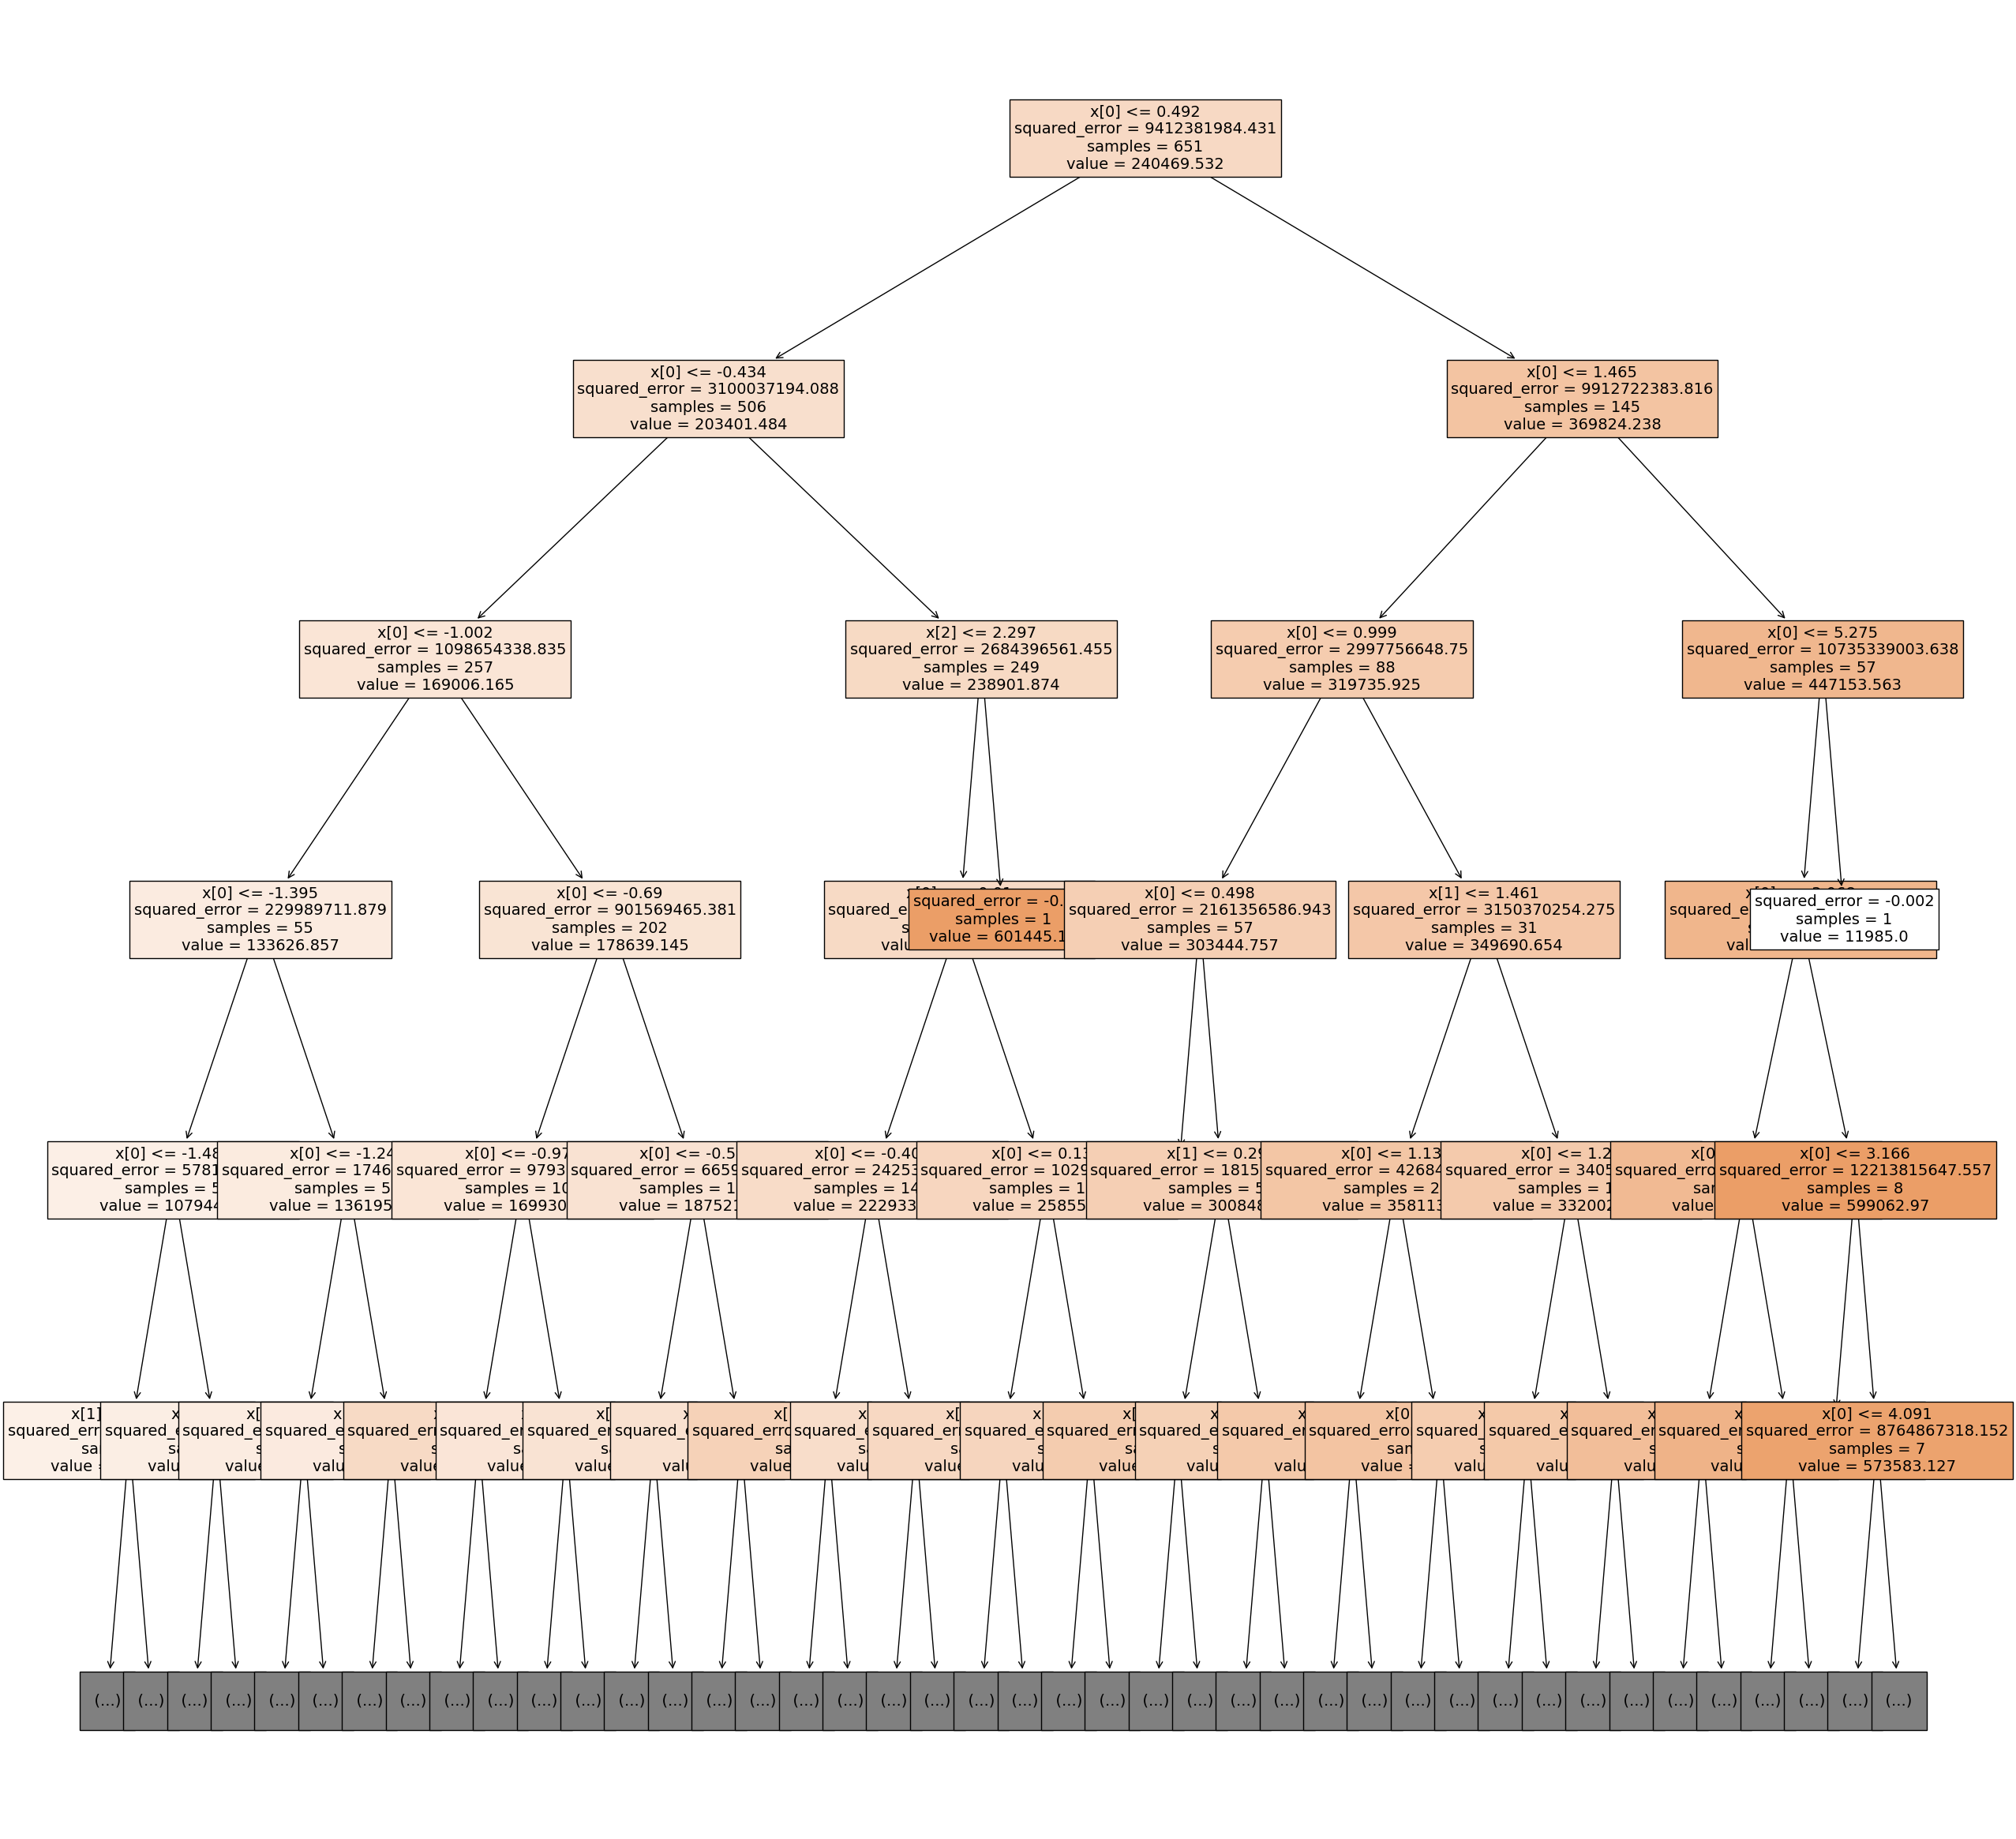

In [24]:
fig = plt.figure(figsize=(30,30))
_ = plot_tree(
    model2.named_steps['dt'],
    filled=True,
    max_depth=5,
    fontsize=14,
)